In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# read cosmological parameters of the different simulations
cosmo = np.array(pd.read_csv('data/abacus_cosmologies.csv', skiprows=1))

omega_b    = cosmo[45:,2]
omega_cdm  = cosmo[45:,3]
h          = cosmo[45:,4]
omega_ncdm = cosmo[45:,10]
sigma8_m   = cosmo[45:,13]
sigma8_cb  = cosmo[45:,14]

Omega_m = (np.array(omega_cdm, dtype='f') + np.array(omega_b, dtype='f') + np.array(omega_ncdm, dtype='f'))/h**2

In [13]:
def alpha_function(magnitude,A,B,C):
    return A + B ** (-magnitude - 20 + C)

# for each simulation, read best-fitting HOD meta-parameters and get alpha for each magnitude threshold
alpha = np.zeros(52)
for c in range(130, 182):
    params = np.loadtxt('data/best_fits/AbacusSummit_base_c%03d_ph000_best_params.txt'%c)
    alpha[c-130] = alpha_function(mags[3*i+j], *params[14:])
        

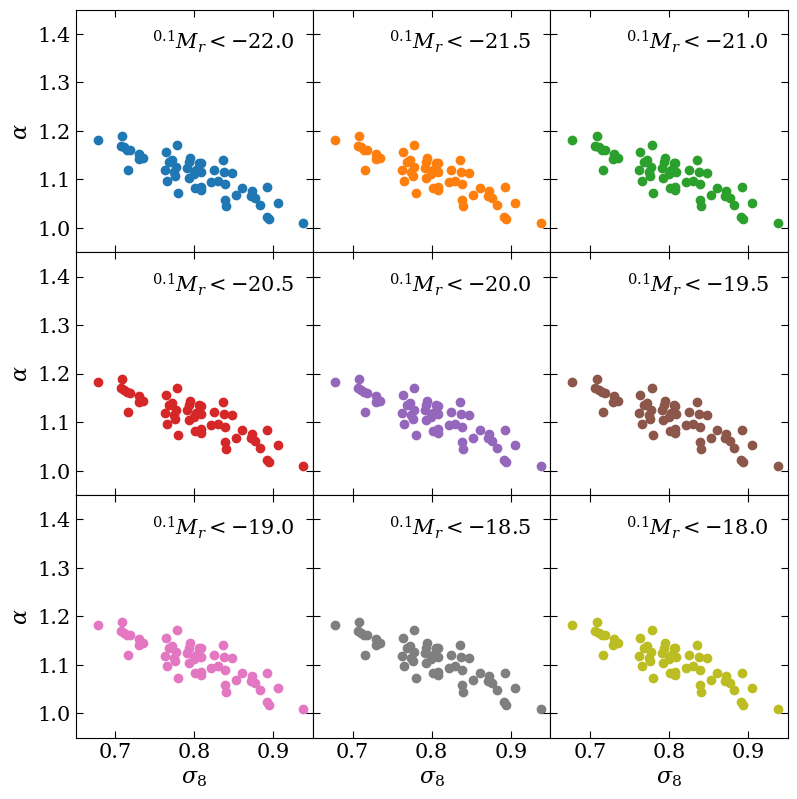

In [14]:
# set font
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# initialize subplots
f, ax = plt.subplots(3,3, figsize=(8,8)) 
plt.subplots_adjust(wspace=0, hspace=0, top = 0.98, bottom = 0.07, right = 0.97, left = 0.08)

mags = np.arange(-22,-17.9,0.5)

for i in range(3):
    for j in range(3):
        ax[i,j].tick_params(direction="in", top=True, right=True, length=5, labelsize=15)
        ax[i,j].tick_params(which="minor", direction="in", top=True, right=True, length=3, labelsize=15)

        ax[i,j].scatter(sigma8_m, alpha, c="C%i"%(3*i+j))
        ax[i,j].plot([],[],c='w',alpha=0,label=r"${}^{0.1}M_r < %.1f$"%mags[3*i+j])
        ax[i,j].legend(loc='upper right', fontsize=15).draw_frame(False)
        
        if i<2:
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel(r"$\sigma_8$", fontsize=16)
        if j>0: 
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel(r"$\alpha$", fontsize=16)
        
        ax[i,j].set_xlim(0.65,0.95)
        ax[i,j].set_ylim(0.95,1.45)

# save the figure as a pdf
plt.savefig("pdf/Figure_7_left.pdf", dpi=300)

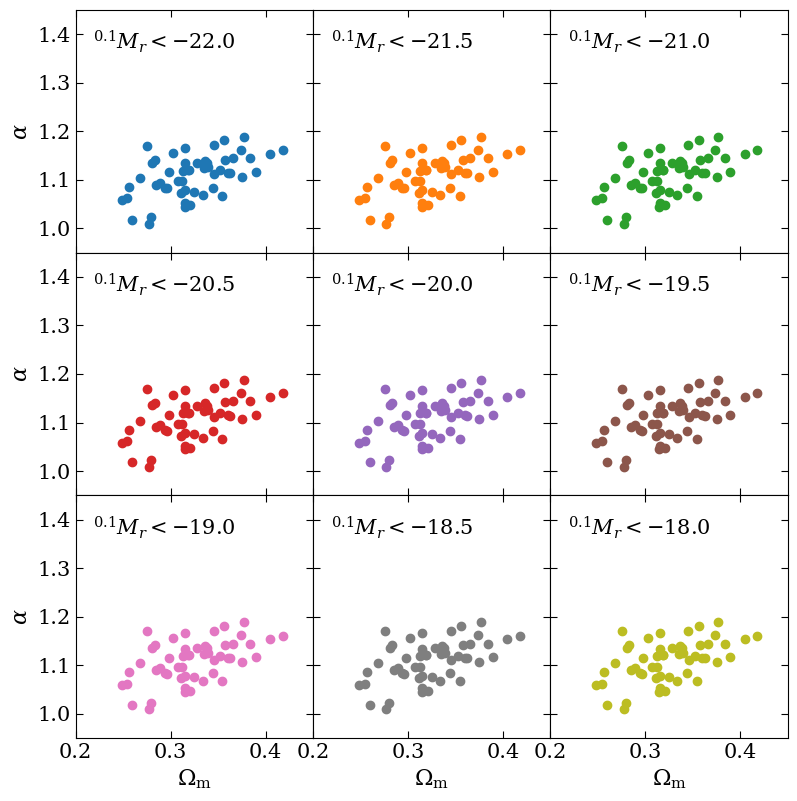

In [15]:
# set font
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# initialize subplots
f, ax = plt.subplots(3,3, figsize=(8,8)) 
plt.subplots_adjust(wspace=0, hspace=0, top = 0.98, bottom = 0.07, right = 0.97, left = 0.08)

mags = np.arange(-22,-17.9,0.5)

for i in range(3):
    for j in range(3):
        ax[i,j].tick_params(direction="in", top=True, right=True, length=5, labelsize=15)
        ax[i,j].tick_params(which="minor", direction="in", top=True, right=True, length=3, labelsize=15)

        ax[i,j].scatter(Omega_m, alpha, c="C%i"%(3*i+j))
        ax[i,j].plot([],[],c='w',alpha=0,label=r"${}^{0.1}M_r < %.1f$"%mags[3*i+j])
        ax[i,j].legend(bbox_to_anchor=(-0.25,1), loc='upper left', fontsize=15).draw_frame(False)
        
        if i<2:
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel(r"$\Omega_{\rm m}$", fontsize=16)
        if j>0: 
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel(r"$\alpha$", fontsize=16)
        
        ax[i,j].set_xlim(0.2,0.45)
        ax[i,j].set_ylim(0.95,1.45)
        
# save the figure as a pdf
plt.savefig("pdf/Figure_7_right.pdf", dpi=300)